In [ ]:
import kagglehub


path = kagglehub.dataset_download("afsadasasdasdas/computer-vision-project-dataset")

print("Path to dataset files:", path)

c:\Users\tessj\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 398M/398M [00:26<00:00, 16.0MB/s] 

Extracting files...


Path to dataset files: C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1


In [ ]:
import os
import pandas as pd


dataset_path = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1"

print("Contents of dataset folder:")
print(os.listdir(dataset_path))


csv_path = os.path.join(dataset_path, "poster_image_scores.csv")

df = pd.read_csv(csv_path, encoding="ISO-8859-1")  # use ISO-8859-1 to avoid encoding issues

# Print number of rows and columns
print("\nCSV shape (rows, columns):", df.shape)

# Print column names
print("CSV column names:", df.columns.tolist())

# Path to poster images
poster_dir = os.path.join(dataset_path, "poster_images", "poster_images")

# Count number of images
num_posters = len(os.listdir(poster_dir))
print("\nNumber of poster images:", num_posters)


print("Example poster files:", os.listdir(poster_dir)[:5])


Contents of dataset folder:
['poster_images', 'poster_image_scores.csv']

CSV shape (rows, columns): (30245, 3)
CSV column names: ['image_path', 'imdb_score', 'file_exists']

Number of poster images: 29943
Example poster files: ['...All_the_Marbles_1981_.jpg', '...And_God_Created_Woman_1956_.jpg', '...and_justice_for_all._1979_.jpg', '...And_the_Pursuit_of_Happiness_1986_.jpg', '...ing_2003_.jpg']


In [ ]:
import pandas as pd

# Paths
dataset_path = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1"
output_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\new_movie_dataset.csv"
csv_path = os.path.join(dataset_path, "poster_image_scores.csv")

df = pd.read_csv(csv_path, encoding="ISO-8859-1")


df.to_csv(output_path, index=False, encoding="utf-8")

print(f"Cleaned CSV saved with {len(df)} rows to:\n{output_path}")


Cleaned CSV saved with 30245 rows to:
C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\new_movie_dataset.csv


In [9]:
# Load the CSV
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\new_movie_dataset.csv"
df = pd.read_csv(csv_path, encoding="ISO-8859-1")

# Count how many rows have missing or empty poster entries
missing_poster_rows = (df['file_exists'] == False).sum() 
print("Number of rows missing or empty:", missing_poster_rows)

Number of rows missing or empty: 0


In [10]:
print(df.head())

                                          image_path  imdb_score  file_exists
0  poster_images/Dracula_Dead_and_Loving_It_1995_...         5.8         True
1                      poster_images/Balto_1995_.jpg         7.1         True
2                      poster_images/Nixon_1995_.jpg         7.1         True
3           poster_images/Cutthroat_Island_1995_.jpg         5.6         True
4                     poster_images/Casino_1995_.jpg         8.2         True


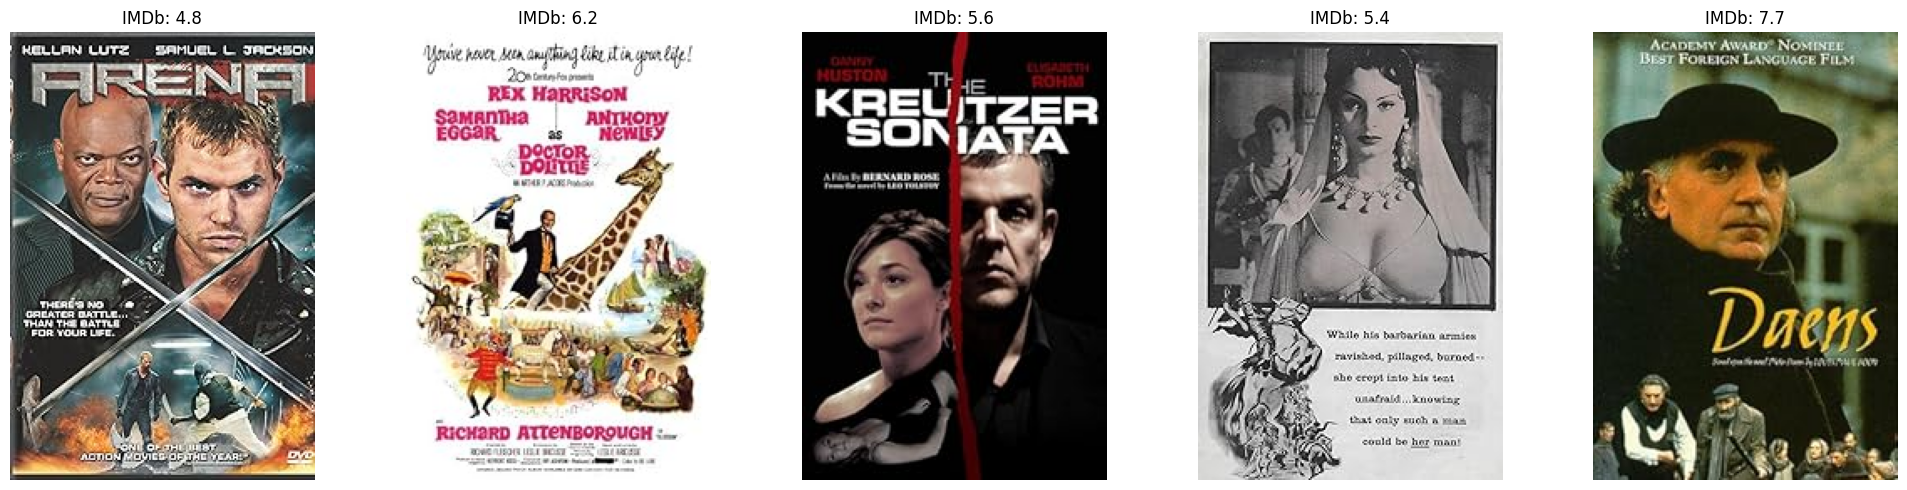

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os

# Paths
csv_path = r"C:\Users\tessj\Desktop\School\Spring_Semester\YZV416E-ComputerVision\project\new_movie_dataset.csv"
poster_dir = r"C:\Users\tessj\.cache\kagglehub\datasets\afsadasasdasdas\computer-vision-project-dataset\versions\1\poster_images\poster_images"

# Load dataset
df = pd.read_csv(csv_path, encoding="utf-8")

# Pick a few examples (5)
examples = df.sample(5, random_state=42)  


fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, (_, row) in zip(axes, examples.iterrows()):
    img_path = os.path.join(poster_dir, os.path.basename(row['image_path']))
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"IMDb: {row['imdb_score']:.1f}")

plt.tight_layout()
plt.show()


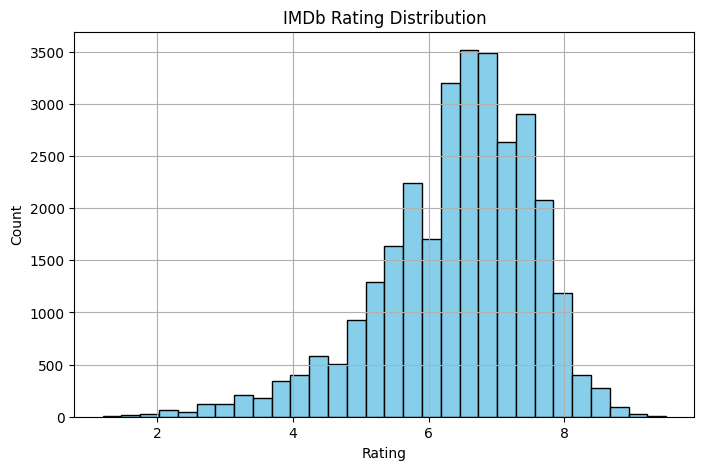

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.hist(df['imdb_score'], bins=30, color='skyblue', edgecolor='black')  # more bins = finer details
plt.title('IMDb Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


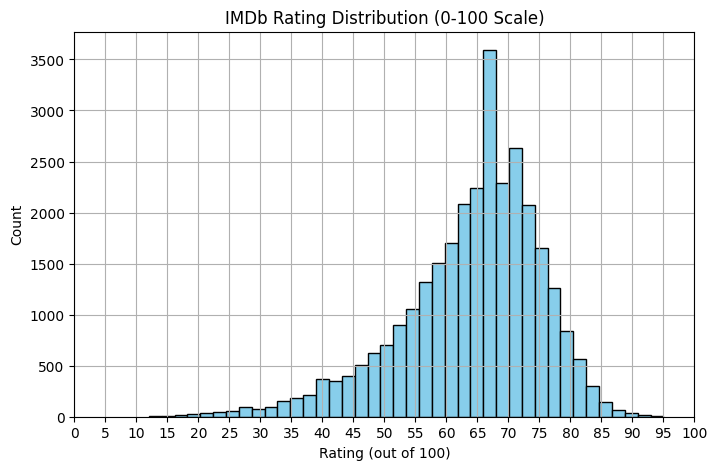

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new column or temporary array with scores scaled to 0-100
scaled_scores = df['imdb_score'] * 10

plt.figure(figsize=(8, 5))
plt.hist(scaled_scores, bins=40, color='skyblue', edgecolor='black')

plt.title('IMDb Rating Distribution (0-100 Scale)')
plt.xlabel('Rating (out of 100)')
plt.ylabel('Count')
plt.grid(True)

# Set x-ticks from 0 to 100, every 5 points
plt.xticks(np.arange(0, 101, 5))

plt.show()
